In [22]:
import pandas as pd
import requests
import datetime as dt
import time

# Ethereum Data Cleaning & Update

In [23]:
test_df = pd.read_csv("./Ethereum/IO/ETH_1min.csv")
test_df = test_df.sort_values(by="Date")
#make sure symbol column matches api symbol requirement for better integration
test_df["Symbol"] = "ETH-USD"
test_df.tail()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
2156947,1597424940,2020-08-14 17:09:00+00:00,ETH-USD,438.82,439.45,438.66,439.28,133.787161
2156948,1597425000,2020-08-14 17:10:00+00:00,ETH-USD,439.17,439.37,438.65,438.82,675.504772
2156949,1597425060,2020-08-14 17:11:00+00:00,ETH-USD,438.76,438.83,437.71,438.37,489.871679
2156950,1597425120,2020-08-14 17:12:00+00:00,ETH-USD,438.08,438.62,437.84,438.46,168.889072
2156951,1597425180,2020-08-14 17:13:00+00:00,ETH-USD,438.56,438.97,438.33,438.97,89.781956


In [24]:
#explore data
orig_len = len(test_df)
print(len(test_df))
print(test_df.dtypes)
test_df.columns

#may be some duplicate data - this is the case for the original kaggle data set
#must remove duplicate timestamps
checker = test_df["Unix Timestamp"]
condition = checker.value_counts().max()
print(condition)

#if true, there are some duplicates that need to be removed
if(condition>1):
    test_df.drop_duplicates(subset="Unix Timestamp", inplace=True)

print("Number of duplicate values removed:", orig_len-len(test_df))

2156952
Unix Timestamp      int64
Date               object
Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
dtype: object
1
Number of duplicate values removed: 0


In [25]:
gran = 60
start_time = "2020-04-16T00:00:00Z"
end_time = "2020-04-16T04:59:00Z"
# end_time = 
url = f"https://api.pro.coinbase.com/products/ETH-USD/candles?granularity={gran}&start={start_time}&end={end_time}"
output = requests.get(url).json()
output

[[1587013140, 152.81, 152.92, 152.84, 152.81, 10.52033809],
 [1587013080, 152.81, 152.95, 152.87, 152.86, 14.84259175],
 [1587013020, 152.85, 152.96, 152.96, 152.92, 8.07277556],
 [1587012960, 152.95, 152.96, 152.95, 152.96, 29.61640061],
 [1587012900, 152.87, 152.96, 152.87, 152.91, 38.37614371],
 [1587012840, 152.91, 153.03, 152.98, 152.98, 5.08947947],
 [1587012780, 152.93, 153.07, 153.07, 153.02, 12.43575498],
 [1587012720, 152.92, 153.02, 152.93, 153.02, 0.77982676],
 [1587012660, 152.84, 152.92, 152.88, 152.85, 1.79552723],
 [1587012600, 152.78, 152.99, 152.99, 152.78, 30.54260355],
 [1587012540, 152.95, 153, 153, 152.95, 12.01452002],
 [1587012480, 152.94, 153, 153, 153, 43.69308365],
 [1587012420, 152.88, 153, 152.89, 153, 36.82947535],
 [1587012360, 152.89, 152.94, 152.94, 152.89, 11.38790486],
 [1587012300, 152.95, 153.01, 153.01, 152.95, 2.12399587],
 [1587012240, 152.82, 152.89, 152.82, 152.83, 2.71120143],
 [1587012180, 152.53, 152.69, 152.53, 152.69, 9.64040497],
 [158701

In [26]:
len(output)

300

In [27]:
timestamp = output[0][0]
print(timestamp)
print(dt.datetime.fromtimestamp(timestamp, tz=dt.timezone.utc))

1587013140
2020-04-16 04:59:00+00:00


In [28]:
start_timestamp = output[-1][0]
print(start_timestamp)
check_start = dt.datetime.fromtimestamp(start_timestamp, tz=dt.timezone.utc)
print(check_start)
check_start.isoformat()

1586995200
2020-04-16 00:00:00+00:00


'2020-04-16T00:00:00+00:00'

In [29]:
start_row_timestamp = test_df.iloc[0, 0]
print(start_row_timestamp)
print(dt.datetime.fromtimestamp(start_row_timestamp, tz=dt.timezone.utc))

1462800720
2016-05-09 13:32:00+00:00


In [30]:
end_row_timestamp = test_df.tail(1).iloc[0, 0]
print(end_row_timestamp)
# unix timestamps from data set are off by 1000, likely recorded in milliseconds instead of seconds
#convert to seconds by dividing by 1000
print(dt.datetime.fromtimestamp(end_row_timestamp/1000, tz=dt.timezone.utc))

1597425180
1970-01-19 11:43:45.180000+00:00


### Must convert Unix the timestamps to a standard format - always have 10 digits

In [31]:
#check how many digits are in the "Unix Timestamp" column in order to clean data
def getNumDigits(df):
    num_digits = set()
    for timestamp in df["Unix Timestamp"]:
        num_digits.add(len(str(timestamp)))
    return num_digits

print(getNumDigits(test_df))

{10}


In [32]:
#there are only 10 or 13 digits for the timestamp, and they must all be standardized to 10 digits
#to represent the timestamp in milliseconds
test_df["Unix Timestamp"] = test_df["Unix Timestamp"].apply(lambda x: int(x) if len(str(x))==10 else x//1000)

In [33]:
#check that the data is changed correctly
print(getNumDigits(test_df))
print(test_df.tail(1).iloc[0, 0])
test_df.head()

{10}
1597425180


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1462800720,2016-05-09 13:32:00+00:00,ETH-USD,0.0,12.0,0.0,12.0,4.156276
1,1462800780,2016-05-09 13:33:00+00:00,ETH-USD,12.0,12.0,10.0,10.0,43.497506
2,1462800840,2016-05-09 13:34:00+00:00,ETH-USD,10.0,10.0,10.0,10.0,8.000000
3,1462800900,2016-05-09 13:35:00+00:00,ETH-USD,10.0,10.0,10.0,10.0,60.000000
4,1462800960,2016-05-09 13:36:00+00:00,ETH-USD,10.0,10.0,10.0,10.0,0.375000


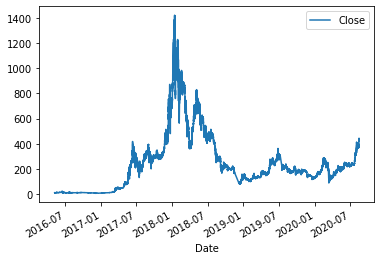

In [35]:
#convert "Date" column to datetime - makes graph cleaner
#only works if not initial cleaning
test_df["Date"] = pd.to_datetime(test_df["Date"], utc=True)

#check plot
test_df.plot(x="Date", y="Close")

In [14]:
#import datetime as dt

#setup basic API call function

#get the last time as a datetime object
def getLastTime(df):
    row = df.tail(1)
    timestamp = row["Unix Timestamp"]
    last_time = dt.datetime.fromtimestamp(timestamp, tz=dt.timezone.utc)
    return last_time

#perform an api call - returns an array of arrays
#given the symbol as well, note that it is different for different currencies
def getData(last_time, curr_time, sym):
    time_diff = curr_time-last_time
    #gets about 5 hours per response, if the current time is more than 5 hours from the last time
    if(time_diff.total_seconds()>=((4*60+59)*60)):
        new_time = last_time+dt.timedelta(hours=4, minutes=59)
        gran = 60
        start_time = last_time.isoformat().replace("+00:00", "")
        end_time = (new_time).isoformat().replace("+00:00", "")
        
        url = f"https://api.pro.coinbase.com/products/{sym}/candles?granularity={gran}&start={start_time}&end={end_time}"
        output = requests.get(url).json()   
    #gets less than 5 hours data in response, if current time is less than 5 hours from the last time examined
    else:
        new_time = curr_time
        gran = 60
        start_time = last_time.isoformat().replace("+00:00", "")
        end_time = (curr_time).isoformat().replace("+00:00", "")
        
        url = f"https://api.pro.coinbase.com/products/{sym}/candles?granularity={gran}&start={start_time}&end={end_time}"
        output = requests.get(url).json()
    
    #implement a "wait" period to ensure that the API calls do not reach the rate limit
    #max requests -> 1 per second for the candles API as of 8/13/20
    time.sleep(2)
    return new_time, output

#put it all together in a function to repeatedly call the API until data is up to date
#must have a "Symbol" column with a valid coin identifier for the coinbase API (e.g. "BTC-USD" or "ETH-USD")
#add a time limit so that the final time is less than a year from the last time
#to break up data updates into smaller, ~hour long chunks
def get_current_data(df):
    orig_df_end_time = getLastTime(df)
    last_time = orig_df_end_time
    curr_time = dt.datetime.now(tz=dt.timezone.utc)
    results = []
    symbol = df["Symbol"].iloc[0]
    
    while((curr_time-last_time).total_seconds() >= 60 and last_time<(orig_df_end_time + dt.timedelta(days=365))):
        print(last_time.isoformat())
        curr_time = dt.datetime.now(tz=dt.timezone.utc)
        #add try/except loop to add robustness to API calls
        try:
            last_time, result = getData(last_time, curr_time, symbol)
        except:
            #case where data is not availble or there is an error in the request
            #so have an empty array as a dummy response
            print("ERROR - THERE IS NOT DATA RESPONSE")
            result = []
        results.append(result)
        
    return results
        

In [15]:
#call api repeatedly to get the data here, then print last item of output
output = get_current_data(test_df)
# print(output[-1])

2020-08-13T21:01:00+00:00
2020-08-14T02:00:00+00:00
2020-08-14T06:59:00+00:00
2020-08-14T11:58:00+00:00
2020-08-14T16:57:00+00:00


In [16]:
#deconstruct the arrays
data = []
for response in output:
    if (not isinstance(response[0], int)):
        for item in response:
            data.append(item)

print(len(data))
        
api_call_df = pd.DataFrame(data, columns=['Unix Timestamp', 'Low', 'High', 'Open', 'Close',
       'Volume'])

#need to add "Date" and "Symbol" columns!
api_call_df

1217


,Unix Timestamp,Low,High,Open,Close,Volume
0,1597370400,425.87,426.50,425.88,426.20,346.183971
1,1597370340,425.87,426.09,426.08,425.88,79.812145
2,1597370280,426.02,426.50,426.50,426.09,99.873552
3,1597370220,426.48,426.72,426.49,426.50,94.348915
4,1597370160,426.46,427.32,426.90,426.46,604.893763
...,...,...,...,...,...,...
1212,1597424460,440.00,442.84,442.84,440.64,812.811694
1213,1597424400,442.00,442.94,442.01,442.94,489.151773
1214,1597424340,442.00,442.02,442.02,442.01,591.945657
1215,1597424280,442.00,442.18,442.18,442.02,429.748848


In [17]:
api_call_df["Date"] = api_call_df["Unix Timestamp"].apply(lambda x: dt.datetime.fromtimestamp(x, tz=dt.timezone.utc))

api_call_df = api_call_df.sort_values(by="Unix Timestamp")
api_call_df["Symbol"] = "ETH-USD"
api_call_df = api_call_df.reset_index(drop=True)

api_call_df

,Unix Timestamp,Low,High,Open,Close,Volume,Date,Symbol
0,1597352460,417.26,421.00,417.26,419.77,3407.489856,2020-08-13 21:01:00+00:00,ETH-USD
1,1597352520,417.40,420.95,420.48,417.82,1937.025228,2020-08-13 21:02:00+00:00,ETH-USD
2,1597352580,417.73,420.21,417.89,419.81,1293.102121,2020-08-13 21:03:00+00:00,ETH-USD
3,1597352640,417.84,420.83,419.99,418.97,2052.345065,2020-08-13 21:04:00+00:00,ETH-USD
4,1597352700,418.71,420.37,418.71,420.37,1108.275682,2020-08-13 21:05:00+00:00,ETH-USD
...,...,...,...,...,...,...,...,...
1212,1597424940,438.66,439.45,438.82,439.28,133.787161,2020-08-14 17:09:00+00:00,ETH-USD
1213,1597425000,438.65,439.37,439.17,438.82,675.504772,2020-08-14 17:10:00+00:00,ETH-USD
1214,1597425060,437.71,438.83,438.76,438.37,489.871679,2020-08-14 17:11:00+00:00,ETH-USD
1215,1597425120,437.84,438.62,438.08,438.46,168.889072,2020-08-14 17:12:00+00:00,ETH-USD


In [18]:
#remove duplicate rows (redundant with older data and API calls overlap)
api_call_df = api_call_df.drop(0)

api_call_df

,Unix Timestamp,Low,High,Open,Close,Volume,Date,Symbol
1,1597352520,417.40,420.95,420.48,417.82,1937.025228,2020-08-13 21:02:00+00:00,ETH-USD
2,1597352580,417.73,420.21,417.89,419.81,1293.102121,2020-08-13 21:03:00+00:00,ETH-USD
3,1597352640,417.84,420.83,419.99,418.97,2052.345065,2020-08-13 21:04:00+00:00,ETH-USD
4,1597352700,418.71,420.37,418.71,420.37,1108.275682,2020-08-13 21:05:00+00:00,ETH-USD
5,1597352760,420.18,422.50,420.42,421.20,1789.488296,2020-08-13 21:06:00+00:00,ETH-USD
...,...,...,...,...,...,...,...,...
1212,1597424940,438.66,439.45,438.82,439.28,133.787161,2020-08-14 17:09:00+00:00,ETH-USD
1213,1597425000,438.65,439.37,439.17,438.82,675.504772,2020-08-14 17:10:00+00:00,ETH-USD
1214,1597425060,437.71,438.83,438.76,438.37,489.871679,2020-08-14 17:11:00+00:00,ETH-USD
1215,1597425120,437.84,438.62,438.08,438.46,168.889072,2020-08-14 17:12:00+00:00,ETH-USD


In [19]:
#append to original df
final_df = test_df.append(api_call_df)
final_df = final_df.reset_index(drop=True)


check = final_df["Unix Timestamp"]
condition=check.value_counts().max()
print("Max number of duplicates/repeated timestamp values: ", condition)

#if true, there are some duplicates that need to be removed
if(condition>1):
    final_df.drop_duplicates(subset="Unix Timestamp", inplace=True)
    print("This should be 1 if there were duplicates and all duplicates were removed", final_df["Unix Timestamp"].value_counts().max())

#make date column use a datetime object
final_df["Date"] = pd.to_datetime(final_df["Date"], utc=True)

final_df

Max number of duplicates/repeated timestamp values:  2
This should be 1 if there were duplicates and all duplicates were removed 1


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1462800720,2016-05-09 13:32:00+00:00,ETH-USD,0.00,12.00,0.00,12.00,4.156276
1,1462800780,2016-05-09 13:33:00+00:00,ETH-USD,12.00,12.00,10.00,10.00,43.497506
2,1462800840,2016-05-09 13:34:00+00:00,ETH-USD,10.00,10.00,10.00,10.00,8.000000
3,1462800900,2016-05-09 13:35:00+00:00,ETH-USD,10.00,10.00,10.00,10.00,60.000000
4,1462800960,2016-05-09 13:36:00+00:00,ETH-USD,10.00,10.00,10.00,10.00,0.375000
...,...,...,...,...,...,...,...,...
2156951,1597424940,2020-08-14 17:09:00+00:00,ETH-USD,438.82,439.45,438.66,439.28,133.787161
2156952,1597425000,2020-08-14 17:10:00+00:00,ETH-USD,439.17,439.37,438.65,438.82,675.504772
2156953,1597425060,2020-08-14 17:11:00+00:00,ETH-USD,438.76,438.83,437.71,438.37,489.871679
2156954,1597425120,2020-08-14 17:12:00+00:00,ETH-USD,438.08,438.62,437.84,438.46,168.889072


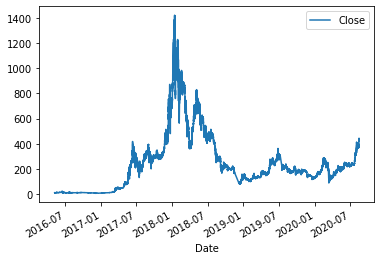

In [20]:
#shows new data for past four months now!
final_df.plot(x="Date", y="Close")

In [21]:
#output final_df to csv
final_df.to_csv("./Ethereum/IO/ETH_1min.csv", index=False)
print("1-minute Ethereum csv file output!")

1-minute Ethereum csv file output!


# Bitcoin Data Cleaning & Update

In [299]:
test_df = pd.read_csv("./Bitcoin/IO/coinbaseUSD_1-min_data.csv")
#comment below only used for initial data cleaning
#test_df = test_df.sort_values(by="Timestamp")
test_df = test_df.sort_values(by="Unix Timestamp")
test_df

,Unnamed: 0,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,0,1417411980,2014-12-01 05:33:00+00:00,BTC-USD,300.00,300.00,300.00,300.00,0.010000
1,1,1417412400,2014-12-01 05:40:00+00:00,BTC-USD,300.00,300.00,300.00,300.00,0.010000
2,2,1417415040,2014-12-01 06:24:00+00:00,BTC-USD,370.00,370.00,370.00,370.00,0.010000
3,3,1417416600,2014-12-01 06:50:00+00:00,BTC-USD,370.00,370.00,370.00,370.00,0.026556
4,4,1417498140,2014-12-02 05:29:00+00:00,BTC-USD,377.00,377.00,377.00,377.00,0.010000
...,...,...,...,...,...,...,...,...,...
2830772,2830772,1597362000,2020-08-13 23:40:00+00:00,BTC-USD,11752.19,11761.79,11752.19,11760.70,4.170578
2830773,2830773,1597362060,2020-08-13 23:41:00+00:00,BTC-USD,11761.51,11766.41,11760.92,11766.40,2.230781
2830774,2830774,1597362120,2020-08-13 23:42:00+00:00,BTC-USD,11766.40,11779.99,11766.40,11779.99,36.322603
2830775,2830775,1597362180,2020-08-13 23:43:00+00:00,BTC-USD,11779.99,11788.88,11779.98,11787.60,16.063125


In [263]:
#explore data
orig_len = len(test_df)
print(len(test_df))
print(test_df.dtypes)
test_df.columns

#may be some duplicate data - this is the case for the original kaggle data set
#must remove duplicate timestamps
# checker = test_df["Timestamp"]
checker = test_df["Unix Timestamp"]
condition = checker.value_counts().max()
print(condition)

2515718
Unnamed: 0          int64
Unix Timestamp      int64
Date               object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
Symbol             object
dtype: object
1


In [264]:
#data looks fine, modify columns to match those in ethereum table

#may look at adjusting the volume of the ethereum table to be standardized to USD
#instead of coins, but can do that at a later date

#only run first time looking at data!
# test_df = test_df.rename(columns={"Timestamp":"Unix Timestamp", "Volume_(BTC)":"Volume"})
# test_df = test_df.drop(columns=["Volume_(Currency)", "Weighted_Price"])
# test_df["Date"] = test_df["Unix Timestamp"].apply(lambda x: dt.datetime.fromtimestamp(x, tz=dt.timezone.utc))

test_df = test_df[["Unix Timestamp", "Date", "Symbol", "Open", "High", "Low", "Close", "Volume"]]
test_df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1417411980,2014-12-01 05:33:00+00:00,BTC-USD,300.00,300.00,300.00,300.00,0.010000
1,1417412400,2014-12-01 05:40:00+00:00,BTC-USD,300.00,300.00,300.00,300.00,0.010000
2,1417415040,2014-12-01 06:24:00+00:00,BTC-USD,370.00,370.00,370.00,370.00,0.010000
3,1417416600,2014-12-01 06:50:00+00:00,BTC-USD,370.00,370.00,370.00,370.00,0.026556
4,1417498140,2014-12-02 05:29:00+00:00,BTC-USD,377.00,377.00,377.00,377.00,0.010000
...,...,...,...,...,...,...,...,...
2515713,1578437040,2020-01-07 22:44:00+00:00,BTC-USD,8061.34,8061.34,8048.87,8053.92,15.126835
2515714,1578437100,2020-01-07 22:45:00+00:00,BTC-USD,8052.00,8057.88,8049.65,8056.03,4.538474
2515715,1578437160,2020-01-07 22:46:00+00:00,BTC-USD,8055.84,8058.75,8053.51,8053.51,3.854042
2515716,1578437220,2020-01-07 22:47:00+00:00,BTC-USD,8055.68,8055.68,8054.63,8054.64,1.486532


In [265]:
#remove NA values from dataframe
test_df.dropna(inplace=True)
test_df = test_df.reset_index(drop=True)
test_df

C:\Users\patri\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1417411980,2014-12-01 05:33:00+00:00,BTC-USD,300.00,300.00,300.00,300.00,0.010000
1,1417412400,2014-12-01 05:40:00+00:00,BTC-USD,300.00,300.00,300.00,300.00,0.010000
2,1417415040,2014-12-01 06:24:00+00:00,BTC-USD,370.00,370.00,370.00,370.00,0.010000
3,1417416600,2014-12-01 06:50:00+00:00,BTC-USD,370.00,370.00,370.00,370.00,0.026556
4,1417498140,2014-12-02 05:29:00+00:00,BTC-USD,377.00,377.00,377.00,377.00,0.010000
...,...,...,...,...,...,...,...,...
2515713,1578437040,2020-01-07 22:44:00+00:00,BTC-USD,8061.34,8061.34,8048.87,8053.92,15.126835
2515714,1578437100,2020-01-07 22:45:00+00:00,BTC-USD,8052.00,8057.88,8049.65,8056.03,4.538474
2515715,1578437160,2020-01-07 22:46:00+00:00,BTC-USD,8055.84,8058.75,8053.51,8053.51,3.854042
2515716,1578437220,2020-01-07 22:47:00+00:00,BTC-USD,8055.68,8055.68,8054.63,8054.64,1.486532


In [266]:
#check that timestamps are all in seconds (not milliseconds)
print(getNumDigits(test_df))

{10}


In [267]:
#add a symbol column to identify queries for "Bitcoin"
if(any(test_df["Symbol"] != "BTC-USD")):
    test_df["Symbol"] = "BTC-USD"
test_df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1417411980,2014-12-01 05:33:00+00:00,BTC-USD,300.00,300.00,300.00,300.00,0.010000
1,1417412400,2014-12-01 05:40:00+00:00,BTC-USD,300.00,300.00,300.00,300.00,0.010000
2,1417415040,2014-12-01 06:24:00+00:00,BTC-USD,370.00,370.00,370.00,370.00,0.010000
3,1417416600,2014-12-01 06:50:00+00:00,BTC-USD,370.00,370.00,370.00,370.00,0.026556
4,1417498140,2014-12-02 05:29:00+00:00,BTC-USD,377.00,377.00,377.00,377.00,0.010000
...,...,...,...,...,...,...,...,...
2515713,1578437040,2020-01-07 22:44:00+00:00,BTC-USD,8061.34,8061.34,8048.87,8053.92,15.126835
2515714,1578437100,2020-01-07 22:45:00+00:00,BTC-USD,8052.00,8057.88,8049.65,8056.03,4.538474
2515715,1578437160,2020-01-07 22:46:00+00:00,BTC-USD,8055.84,8058.75,8053.51,8053.51,3.854042
2515716,1578437220,2020-01-07 22:47:00+00:00,BTC-USD,8055.68,8055.68,8054.63,8054.64,1.486532


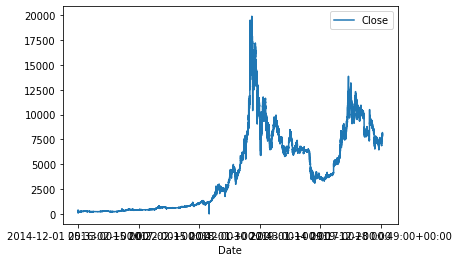

In [268]:
#check plot
test_df.plot(x="Date", y="Close")

In [270]:
#test that api call is working correctly - originally ran the scrape with ETHEREUM symbol selected
#need to change it to BTC, verify here
#will also break requests into 1-hour segments (1 year from start date, no more than a year at a time)

#look at response to see if current value for bitcoin (around 11k for 8/13, for example)
url = f"https://api.pro.coinbase.com/products/BTC-USD/candles?granularity=60"
check_btc = requests.get(url).json()  
check_btc

[[1597359480, 11745.95, 11749.73, 11749.59, 11746.81, 12.73718045],
 [1597359420, 11749.58, 11758.04, 11757.48, 11749.59, 2.52353922],
 [1597359360, 11753.53, 11759.53, 11756.04, 11758.04, 2.6697476],
 [1597359300, 11749.59, 11756.69, 11749.59, 11756.69, 3.56071595],
 [1597359240, 11746.17, 11755, 11749.64, 11751.27, 6.83927319],
 [1597359180, 11737.35, 11749.65, 11747.39, 11749.64, 7.94274154],
 [1597359120, 11742.95, 11758.41, 11754.2, 11747.39, 14.24837021],
 [1597359060, 11751.4, 11759.39, 11756.41, 11754.79, 5.61163117],
 [1597359000, 11755.27, 11760.79, 11758.49, 11758.07, 11.86381588],
 [1597358940, 11756.08, 11763.71, 11761.68, 11756.15, 5.48485603],
 [1597358880, 11756.25, 11764.71, 11758.86, 11763.28, 7.9442701],
 [1597358820, 11757.41, 11768.16, 11762.19, 11758.86, 12.96858421],
 [1597358760, 11754.54, 11767.17, 11767.17, 11760.68, 9.0367553],
 [1597358700, 11762.03, 11768.91, 11762.91, 11768.42, 19.30438947],
 [1597358640, 11753.8, 11762.91, 11753.8, 11762.91, 3.32560674],


In [271]:
#call api repeatedly to get the data here, then print last item of output
#takes about 1 hour to get a year's worth of data, at the 1-minute granularity from Coinbase
#due to the special 1 request/sec rate limit for this API
#cannot get more that 1 year of data from last date in .csv file at a time! (broken up to reduce strain/make easier to save)
output = get_current_data(test_df)
print(output[-1])

2020-01-07T22:48:00+00:00
2020-01-08T03:47:00+00:00
2020-01-08T08:46:00+00:00
2020-01-08T13:45:00+00:00
2020-01-08T18:44:00+00:00
2020-01-08T23:43:00+00:00
2020-01-09T04:42:00+00:00
2020-01-09T09:41:00+00:00
2020-01-09T14:40:00+00:00
2020-01-09T19:39:00+00:00
2020-01-10T00:38:00+00:00
2020-01-10T05:37:00+00:00
2020-01-10T10:36:00+00:00
2020-01-10T15:35:00+00:00
2020-01-10T20:34:00+00:00
2020-01-11T01:33:00+00:00
2020-01-11T06:32:00+00:00
2020-01-11T11:31:00+00:00
2020-01-11T16:30:00+00:00
2020-01-11T21:29:00+00:00
2020-01-12T02:28:00+00:00
2020-01-12T07:27:00+00:00
2020-01-12T12:26:00+00:00
2020-01-12T17:25:00+00:00
2020-01-12T22:24:00+00:00
2020-01-13T03:23:00+00:00
2020-01-13T08:22:00+00:00
2020-01-13T13:21:00+00:00
2020-01-13T18:20:00+00:00
2020-01-13T23:19:00+00:00
2020-01-14T04:18:00+00:00
2020-01-14T09:17:00+00:00
2020-01-14T14:16:00+00:00
2020-01-14T19:15:00+00:00
2020-01-15T00:14:00+00:00
2020-01-15T05:13:00+00:00
2020-01-15T10:12:00+00:00
2020-01-15T15:11:00+00:00
2020-01-15T2

2020-03-13T13:32:00+00:00
2020-03-13T18:31:00+00:00
2020-03-13T23:30:00+00:00
2020-03-14T04:29:00+00:00
2020-03-14T09:28:00+00:00
2020-03-14T14:27:00+00:00
2020-03-14T19:26:00+00:00
2020-03-15T00:25:00+00:00
2020-03-15T05:24:00+00:00
2020-03-15T10:23:00+00:00
2020-03-15T15:22:00+00:00
2020-03-15T20:21:00+00:00
2020-03-16T01:20:00+00:00
2020-03-16T06:19:00+00:00
2020-03-16T11:18:00+00:00
2020-03-16T16:17:00+00:00
2020-03-16T21:16:00+00:00
2020-03-17T02:15:00+00:00
2020-03-17T07:14:00+00:00
2020-03-17T12:13:00+00:00
2020-03-17T17:12:00+00:00
2020-03-17T22:11:00+00:00
2020-03-18T03:10:00+00:00
2020-03-18T08:09:00+00:00
2020-03-18T13:08:00+00:00
2020-03-18T18:07:00+00:00
2020-03-18T23:06:00+00:00
2020-03-19T04:05:00+00:00
2020-03-19T09:04:00+00:00
2020-03-19T14:03:00+00:00
2020-03-19T19:02:00+00:00
2020-03-20T00:01:00+00:00
2020-03-20T05:00:00+00:00
2020-03-20T09:59:00+00:00
2020-03-20T14:58:00+00:00
2020-03-20T19:57:00+00:00
2020-03-21T00:56:00+00:00
2020-03-21T05:55:00+00:00
2020-03-21T1

2020-05-18T04:16:00+00:00
2020-05-18T09:15:00+00:00
2020-05-18T14:14:00+00:00
2020-05-18T19:13:00+00:00
2020-05-19T00:12:00+00:00
2020-05-19T05:11:00+00:00
2020-05-19T10:10:00+00:00
2020-05-19T15:09:00+00:00
2020-05-19T20:08:00+00:00
2020-05-20T01:07:00+00:00
2020-05-20T06:06:00+00:00
2020-05-20T11:05:00+00:00
2020-05-20T16:04:00+00:00
2020-05-20T21:03:00+00:00
2020-05-21T02:02:00+00:00
2020-05-21T07:01:00+00:00
2020-05-21T12:00:00+00:00
2020-05-21T16:59:00+00:00
2020-05-21T21:58:00+00:00
2020-05-22T02:57:00+00:00
2020-05-22T07:56:00+00:00
2020-05-22T12:55:00+00:00
2020-05-22T17:54:00+00:00
2020-05-22T22:53:00+00:00
2020-05-23T03:52:00+00:00
2020-05-23T08:51:00+00:00
2020-05-23T13:50:00+00:00
2020-05-23T18:49:00+00:00
2020-05-23T23:48:00+00:00
2020-05-24T04:47:00+00:00
2020-05-24T09:46:00+00:00
2020-05-24T14:45:00+00:00
2020-05-24T19:44:00+00:00
2020-05-25T00:43:00+00:00
2020-05-25T05:42:00+00:00
2020-05-25T10:41:00+00:00
2020-05-25T15:40:00+00:00
2020-05-25T20:39:00+00:00
2020-05-26T0

2020-07-22T19:00:00+00:00
2020-07-22T23:59:00+00:00
2020-07-23T04:58:00+00:00
2020-07-23T09:57:00+00:00
2020-07-23T14:56:00+00:00
2020-07-23T19:55:00+00:00
2020-07-24T00:54:00+00:00
2020-07-24T05:53:00+00:00
2020-07-24T10:52:00+00:00
2020-07-24T15:51:00+00:00
2020-07-24T20:50:00+00:00
2020-07-25T01:49:00+00:00
2020-07-25T06:48:00+00:00
2020-07-25T11:47:00+00:00
2020-07-25T16:46:00+00:00
2020-07-25T21:45:00+00:00
2020-07-26T02:44:00+00:00
2020-07-26T07:43:00+00:00
2020-07-26T12:42:00+00:00
2020-07-26T17:41:00+00:00
2020-07-26T22:40:00+00:00
2020-07-27T03:39:00+00:00
2020-07-27T08:38:00+00:00
2020-07-27T13:37:00+00:00
2020-07-27T18:36:00+00:00
2020-07-27T23:35:00+00:00
2020-07-28T04:34:00+00:00
2020-07-28T09:33:00+00:00
2020-07-28T14:32:00+00:00
2020-07-28T19:31:00+00:00
2020-07-29T00:30:00+00:00
2020-07-29T05:29:00+00:00
2020-07-29T10:28:00+00:00
2020-07-29T15:27:00+00:00
2020-07-29T20:26:00+00:00
2020-07-30T01:25:00+00:00
2020-07-30T06:24:00+00:00
2020-07-30T11:23:00+00:00
2020-07-30T1

In [280]:
#deconstruct the arrays
data = []
count_empty = 0
for response in output:
    if(len(response) == 0):
        count_empty+=1
        continue
    if (not isinstance(response[0], int)):
        for item in response:
            data.append(item)

print(len(data))
        
api_call_df = pd.DataFrame(data, columns=['Unix Timestamp', 'Low', 'High', 'Open', 'Close',
       'Volume'])

#need to add "Date" and "Symbol" columns!
api_call_df

316114


,Unix Timestamp,Low,High,Open,Close,Volume
0,1578455220,8309.23,8316.64,8316.64,8314.97,3.178364
1,1578455160,8312.61,8330.00,8325.90,8312.63,3.304137
2,1578455100,8322.03,8330.00,8325.57,8323.83,3.879636
3,1578455040,8315.92,8326.25,8316.38,8323.52,5.088214
4,1578454980,8310.65,8335.95,8333.32,8315.60,18.856787
...,...,...,...,...,...,...
316109,1597346280,11516.76,11523.19,11521.69,11518.10,4.775924
316110,1597346220,11519.96,11529.85,11522.95,11523.29,12.696256
316111,1597346160,11518.55,11522.70,11521.13,11522.70,11.299804
316112,1597346100,11507.82,11521.40,11512.84,11518.04,5.201877


In [281]:
#data looks fine, modify columns to match those in ethereum/new bitcoin table
#add date and symbol

api_call_df["Date"] = api_call_df["Unix Timestamp"].apply(lambda x: dt.datetime.fromtimestamp(x, tz=dt.timezone.utc))

api_call_df = api_call_df.sort_values(by="Unix Timestamp")
api_call_df["Symbol"] = "BTC-USD"
api_call_df = api_call_df.reset_index(drop=True)

api_call_df

,Unix Timestamp,Low,High,Open,Close,Volume,Date,Symbol
0,1578437280,8055.34,8056.90,8055.34,8055.39,3.171499,2020-01-07 22:48:00+00:00,BTC-USD
1,1578437340,8054.00,8056.90,8056.27,8054.01,2.679036,2020-01-07 22:49:00+00:00,BTC-USD
2,1578437400,8041.86,8054.00,8054.00,8041.86,16.497639,2020-01-07 22:50:00+00:00,BTC-USD
3,1578437460,8034.00,8045.21,8043.53,8034.01,7.329911,2020-01-07 22:51:00+00:00,BTC-USD
4,1578437520,8028.08,8038.82,8034.01,8029.80,22.724510,2020-01-07 22:52:00+00:00,BTC-USD
...,...,...,...,...,...,...,...,...
316109,1597362000,11752.19,11761.79,11752.19,11760.70,4.170578,2020-08-13 23:40:00+00:00,BTC-USD
316110,1597362060,11760.92,11766.41,11761.51,11766.40,2.230781,2020-08-13 23:41:00+00:00,BTC-USD
316111,1597362120,11766.40,11779.99,11766.40,11779.99,36.322603,2020-08-13 23:42:00+00:00,BTC-USD
316112,1597362180,11779.98,11788.88,11779.99,11787.60,16.063125,2020-08-13 23:43:00+00:00,BTC-USD


In [282]:
#remove duplicate rows (redundant with older data and API calls overlap)
api_call_df = api_call_df.drop(0)

api_call_df

,Unix Timestamp,Low,High,Open,Close,Volume,Date,Symbol
1,1578437340,8054.00,8056.90,8056.27,8054.01,2.679036,2020-01-07 22:49:00+00:00,BTC-USD
2,1578437400,8041.86,8054.00,8054.00,8041.86,16.497639,2020-01-07 22:50:00+00:00,BTC-USD
3,1578437460,8034.00,8045.21,8043.53,8034.01,7.329911,2020-01-07 22:51:00+00:00,BTC-USD
4,1578437520,8028.08,8038.82,8034.01,8029.80,22.724510,2020-01-07 22:52:00+00:00,BTC-USD
5,1578437580,8025.00,8031.39,8029.80,8025.21,5.981128,2020-01-07 22:53:00+00:00,BTC-USD
...,...,...,...,...,...,...,...,...
316109,1597362000,11752.19,11761.79,11752.19,11760.70,4.170578,2020-08-13 23:40:00+00:00,BTC-USD
316110,1597362060,11760.92,11766.41,11761.51,11766.40,2.230781,2020-08-13 23:41:00+00:00,BTC-USD
316111,1597362120,11766.40,11779.99,11766.40,11779.99,36.322603,2020-08-13 23:42:00+00:00,BTC-USD
316112,1597362180,11779.98,11788.88,11779.99,11787.60,16.063125,2020-08-13 23:43:00+00:00,BTC-USD


In [283]:
#append to original df
final_df = test_df.append(api_call_df)
final_df = final_df.reset_index(drop=True)

check = final_df["Unix Timestamp"]
condition=check.value_counts().max()
print("Max number of duplicates/repeated timestamp values: ", condition)

#if true, there are some duplicates that need to be removed
if(condition>1):
    final_df.drop_duplicates(subset="Unix Timestamp", inplace=True)
    print("This should be 1 if there were duplicates and all duplicates were removed", final_df["Unix Timestamp"].value_counts().max())

final_df

Max number of duplicates/repeated timestamp values:  2
This should be 1 if there were duplicates and all duplicates were removed 1


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1417411980,2014-12-01 05:33:00+00:00,BTC-USD,300.00,300.00,300.00,300.00,0.010000
1,1417412400,2014-12-01 05:40:00+00:00,BTC-USD,300.00,300.00,300.00,300.00,0.010000
2,1417415040,2014-12-01 06:24:00+00:00,BTC-USD,370.00,370.00,370.00,370.00,0.010000
3,1417416600,2014-12-01 06:50:00+00:00,BTC-USD,370.00,370.00,370.00,370.00,0.026556
4,1417498140,2014-12-02 05:29:00+00:00,BTC-USD,377.00,377.00,377.00,377.00,0.010000
...,...,...,...,...,...,...,...,...
2831826,1597362000,2020-08-13 23:40:00+00:00,BTC-USD,11752.19,11761.79,11752.19,11760.70,4.170578
2831827,1597362060,2020-08-13 23:41:00+00:00,BTC-USD,11761.51,11766.41,11760.92,11766.40,2.230781
2831828,1597362120,2020-08-13 23:42:00+00:00,BTC-USD,11766.40,11779.99,11766.40,11779.99,36.322603
2831829,1597362180,2020-08-13 23:43:00+00:00,BTC-USD,11779.99,11788.88,11779.98,11787.60,16.063125


In [284]:
#reset the index in case any duplicates were removed
final_df = final_df.reset_index(drop=True)

#need to make sure the symbol is always BTCUSD - was not available for original dataset
#had NA values in that case
if(any(final_df["Symbol"].isna())):
    final_df["Symbol"] = "BTC-USD"
    
    
final_df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1417411980,2014-12-01 05:33:00+00:00,BTC-USD,300.00,300.00,300.00,300.00,0.010000
1,1417412400,2014-12-01 05:40:00+00:00,BTC-USD,300.00,300.00,300.00,300.00,0.010000
2,1417415040,2014-12-01 06:24:00+00:00,BTC-USD,370.00,370.00,370.00,370.00,0.010000
3,1417416600,2014-12-01 06:50:00+00:00,BTC-USD,370.00,370.00,370.00,370.00,0.026556
4,1417498140,2014-12-02 05:29:00+00:00,BTC-USD,377.00,377.00,377.00,377.00,0.010000
...,...,...,...,...,...,...,...,...
2830772,1597362000,2020-08-13 23:40:00+00:00,BTC-USD,11752.19,11761.79,11752.19,11760.70,4.170578
2830773,1597362060,2020-08-13 23:41:00+00:00,BTC-USD,11761.51,11766.41,11760.92,11766.40,2.230781
2830774,1597362120,2020-08-13 23:42:00+00:00,BTC-USD,11766.40,11779.99,11766.40,11779.99,36.322603
2830775,1597362180,2020-08-13 23:43:00+00:00,BTC-USD,11779.99,11788.88,11779.98,11787.60,16.063125


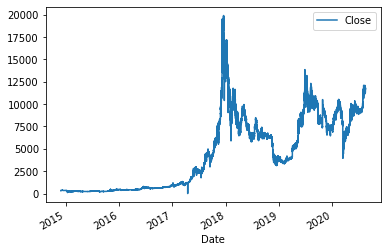

In [297]:
#check that plot of dataframe looks reasonable, with updated data
final_df.plot(x="Date", y="Close")

In [296]:
final_df.dtypes
#convert to datetime
final_df["Date"] = pd.to_datetime(final_df["Date"], utc=True)
final_df[final_df["Date"] > "2020-1-1"].min()

Unix Timestamp                   1577836860
Date              2020-01-01 00:01:00+00:00
Symbol                              BTC-USD
Open                                 3933.8
High                                4015.28
Low                                    3858
Close                                3936.5
Volume                           0.00085527
dtype: object

In [298]:
#output final_df (which has been updated with new values appended and duplicates removed)
#to the same location as the beginning csv file - the I/O folder
final_df.to_csv("./Bitcoin/IO/coinbaseUSD_1-min_data.csv")
print("File output complete!")
print("Date Range of last update: {} to {}".format(api_call_df["Date"].head(1), api_call_df["Date"].tail(1)))

File output complete!
Date Range of last update: 1   2020-01-07 22:49:00+00:00
Name: Date, dtype: datetime64[ns, UTC] to 316113   2020-08-13 23:44:00+00:00
Name: Date, dtype: datetime64[ns, UTC]
